<a href="https://colab.research.google.com/github/KamyllaJawad/8-Fase-Exercicios/blob/master/Kamylla_N2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados para Empresa FabProd e produto de Limpeza

Considere a empresa FabProd responsável por fabricar e distribuir produtos de limpeza para região Sul do Brasil. Seus produtos são Cloro, Desinfetante, Sabão de Glicerina, Sabão de Côco, Cera e Detergente.
No entanto, CEO dessa empresa não tem conhecimento do quanto a FabProdpode expandir a distribuição nessa região e nas demais regiões do Brasil.

* Primeiro passo:
Faça uma demonstração criando e utilizando dados sintéticos do produto, regiao, vendas por regiao, custo de produto, vendas por mes e nos anos 2019 ate 2022

* Segundo passo:
Crie uma analise exploratoria dos dados gerado

* Terceiro passo:
Faça um modelo preditivo que preveja como serão as vendas por regiao nos proximo ano

### Importando as bibliotecas necessárias

In [45]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Criando os dados sintéticos

In [46]:
# Gerando os dados sintéticos
produtos = ['Cloro', 'Desinfetante', 'Sabão de Glicerina', 'Sabão de Côco', 'Cera', 'Detergente']
regioes = ['Sul', 'Sudeste', 'Centro-Oeste', 'Nordeste', 'Norte']
anos = [2019, 2020, 2021, 2022]
meses = range(1, 13)
vendas = np.random.randint(100, 1000, size=(len(produtos), len(regioes), len(anos), len(meses)))
custos = np.random.uniform(1, 5, size=(len(produtos), len(regioes)))
df = pd.DataFrame({
    'Produto': np.repeat(produtos, len(regioes) * len(anos) * len(meses)),
    'Região': np.tile(np.repeat(regioes, len(anos) * len(meses)), len(produtos)),
    'Ano': np.tile(np.repeat(anos, len(meses)), len(produtos) * len(regioes)),
    'Mês': np.tile(meses, len(produtos) * len(regioes) * len(anos)),
    'Vendas': vendas.ravel(),
    'Custo': np.tile(custos, len(anos) * len(meses)).ravel()
})

# Visualizando o DataFrame
print(df.head())

df.to_csv('dados_sinteticos.csv', index=False)

  Produto Região   Ano  Mês  Vendas     Custo
0   Cloro    Sul  2019    1     275  3.622645
1   Cloro    Sul  2019    2     725  3.609117
2   Cloro    Sul  2019    3     878  2.251317
3   Cloro    Sul  2019    4     803  1.015698
4   Cloro    Sul  2019    5     724  2.262376


### Análise Explorátoria dos Dados Sintéticos



Tipos de dados:
Quantitativas discretas: ['Mês', 'Ano', 'Vendas']
Quantitativas contínuas: ['Custo']
Qualitativas nominais: ['Produto', 'Região']


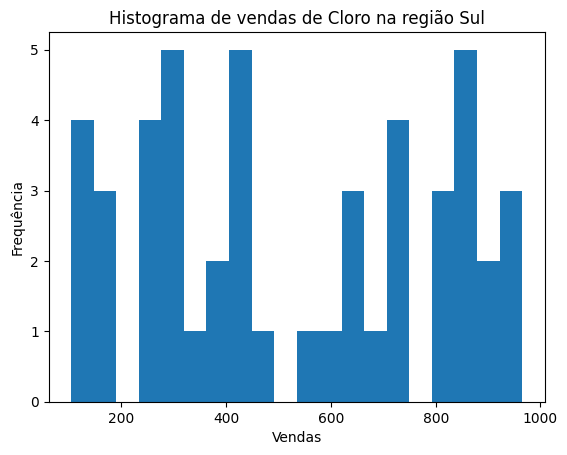

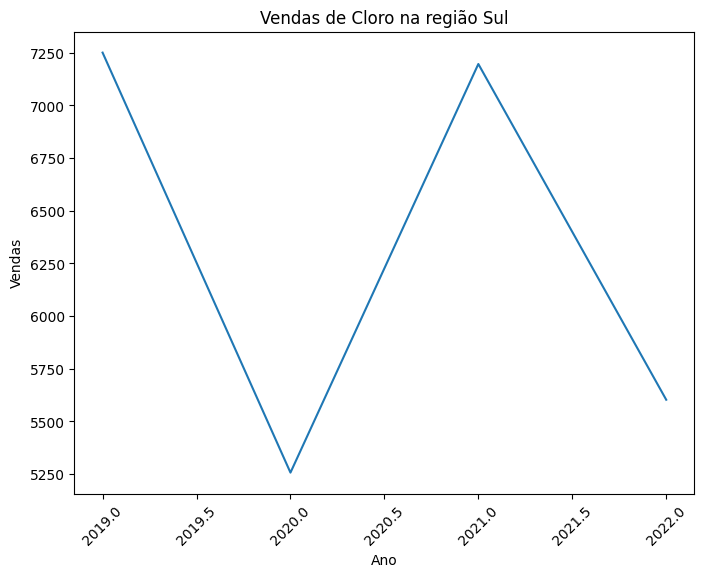

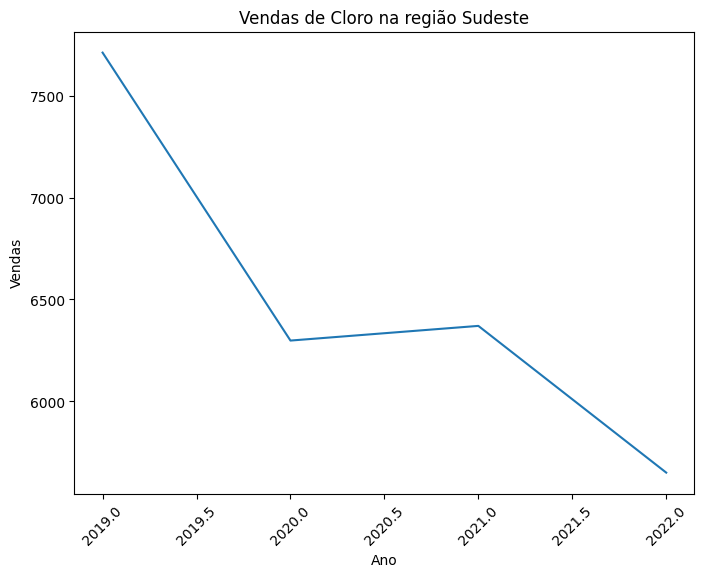

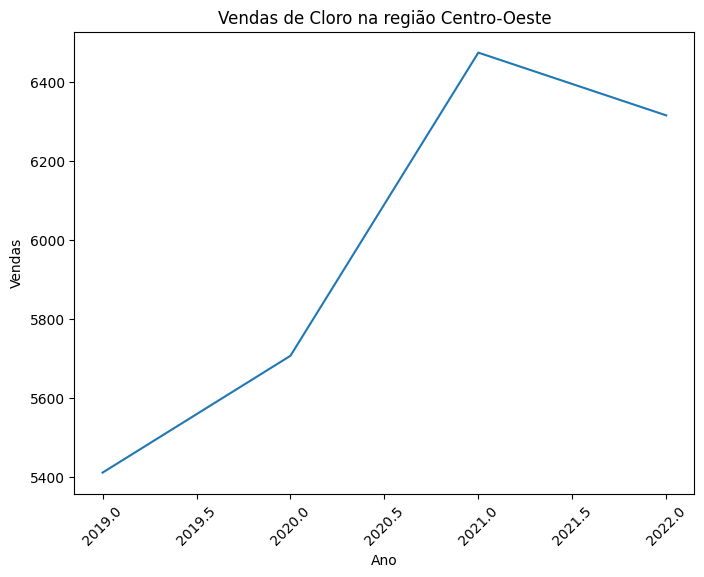

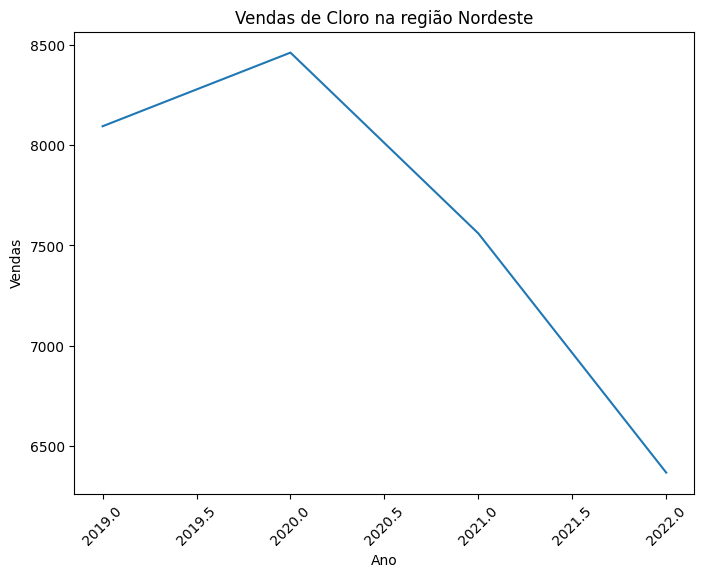

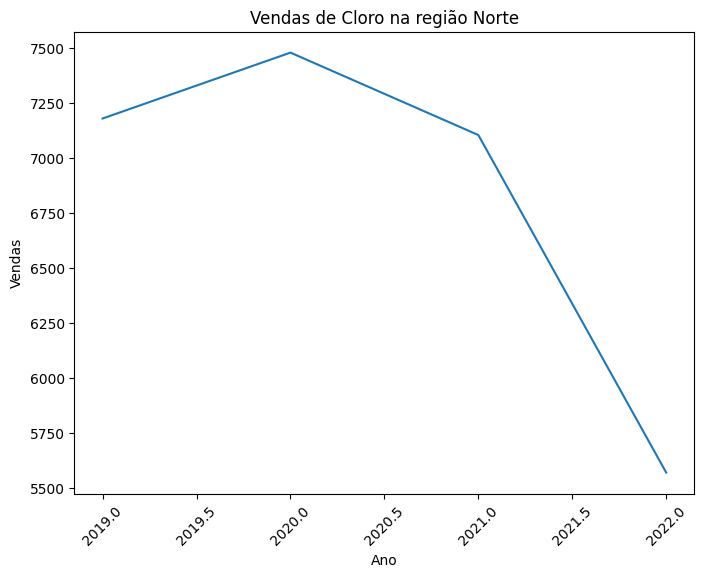

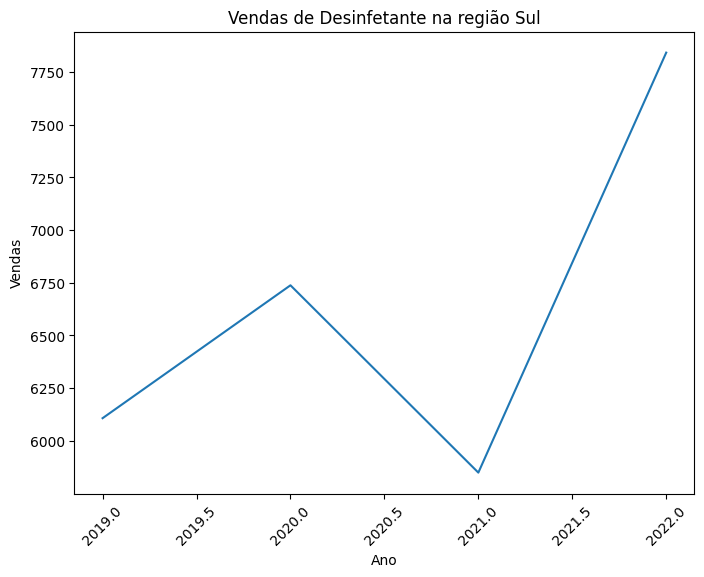

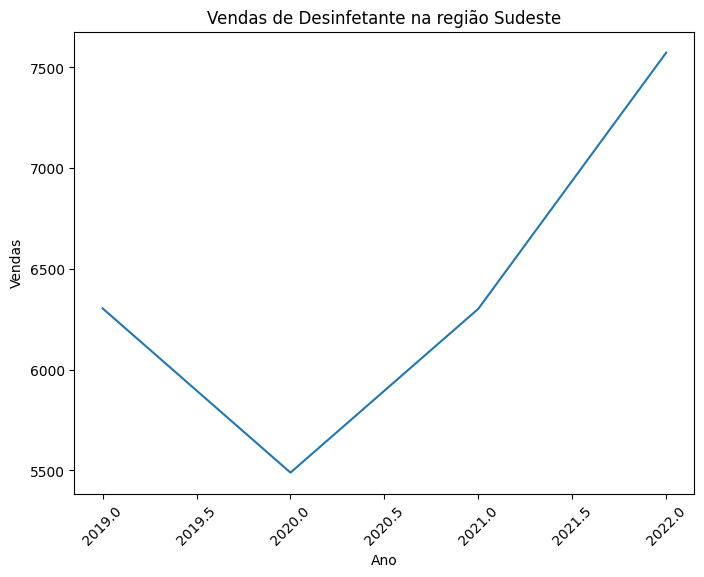

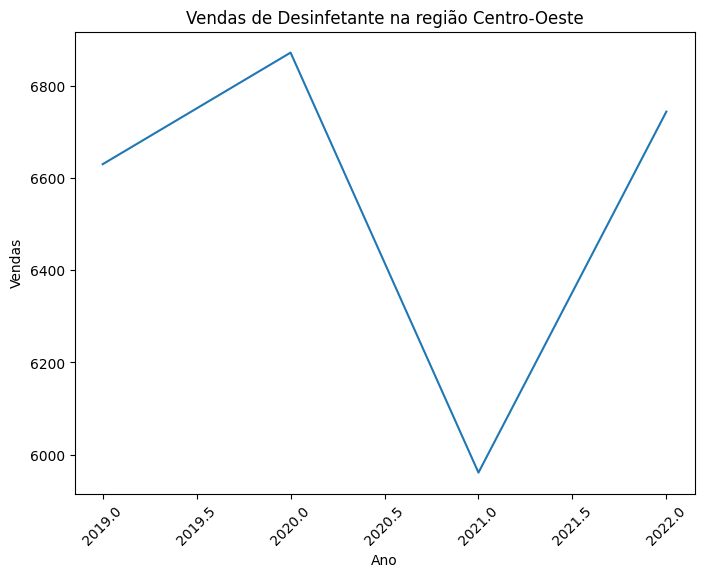

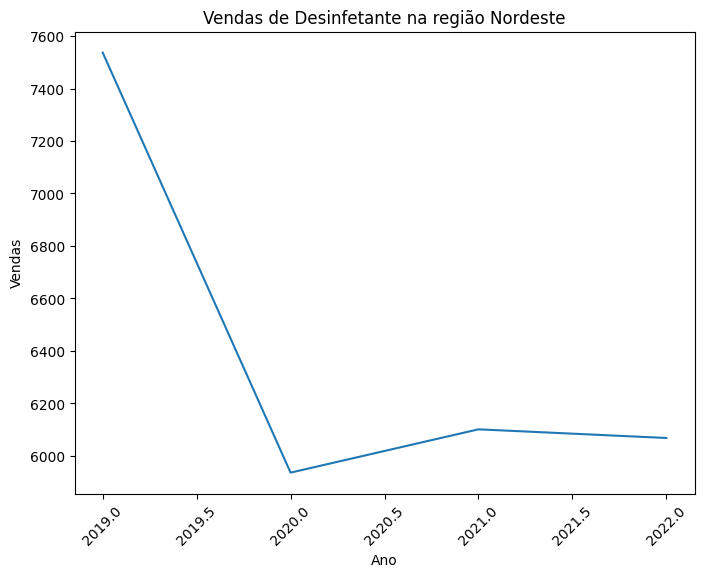

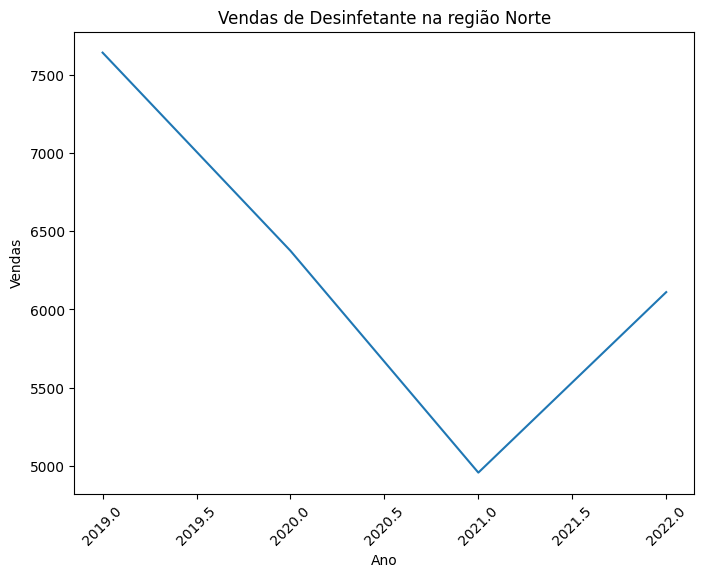

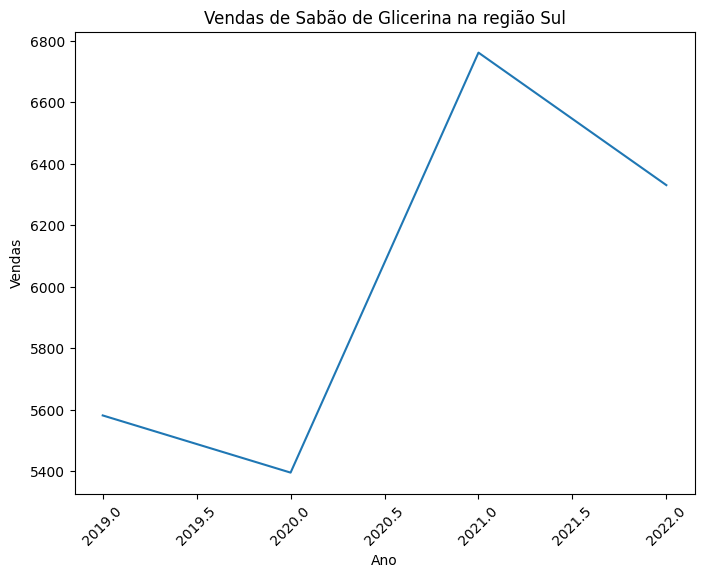

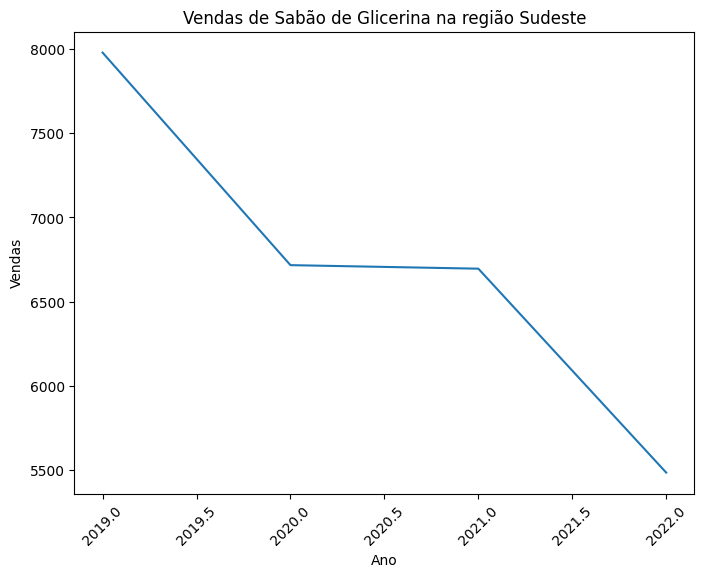

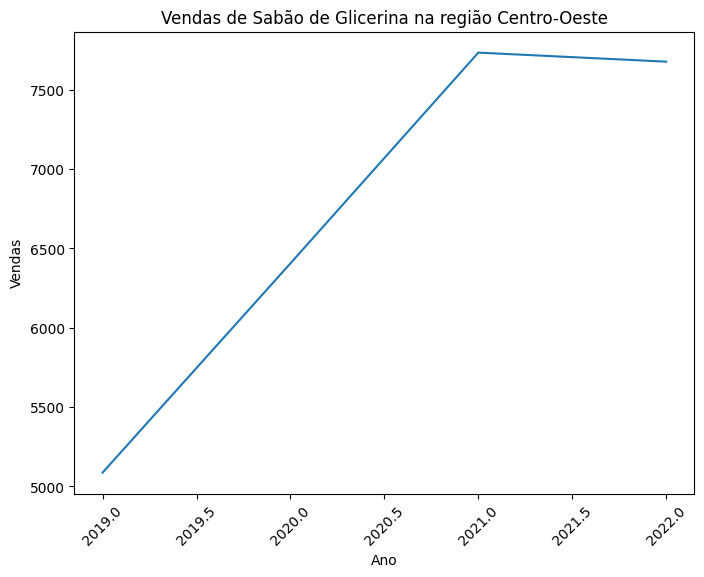

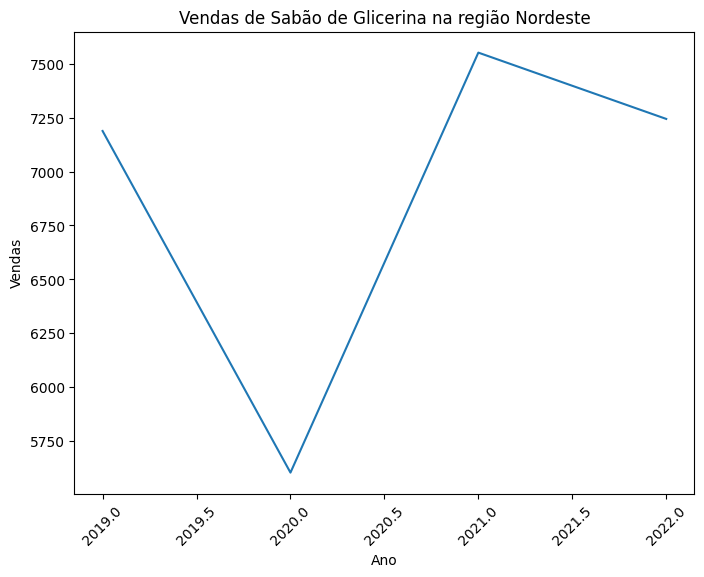

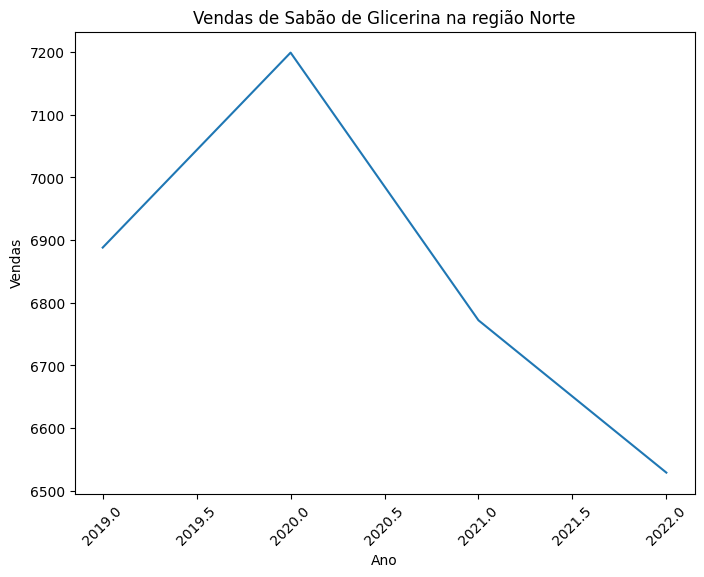

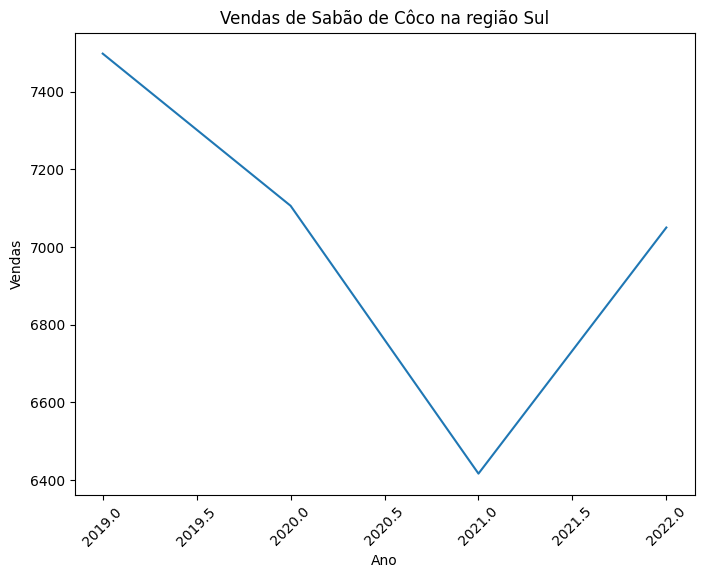

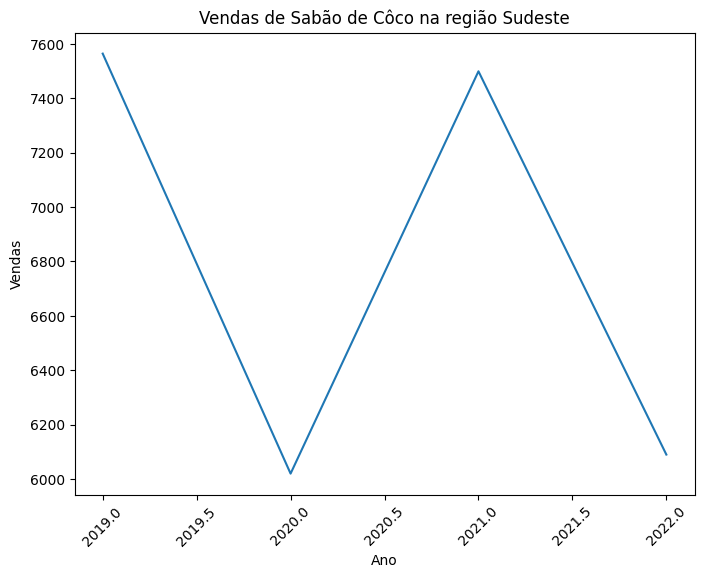

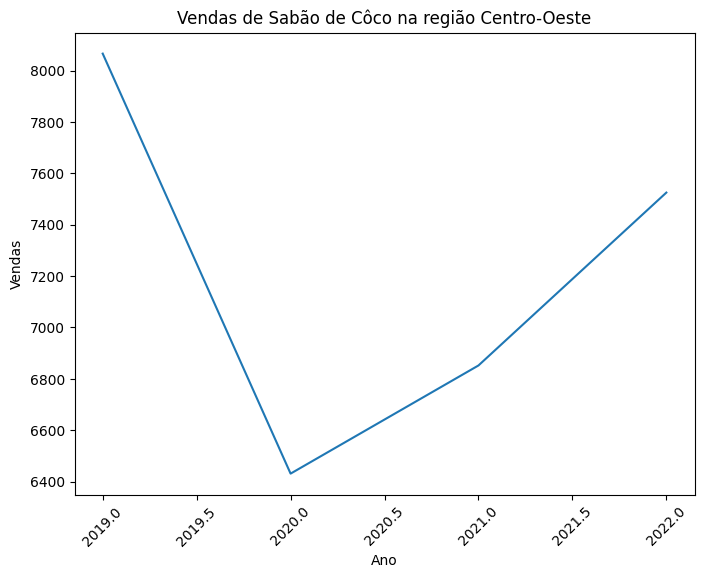

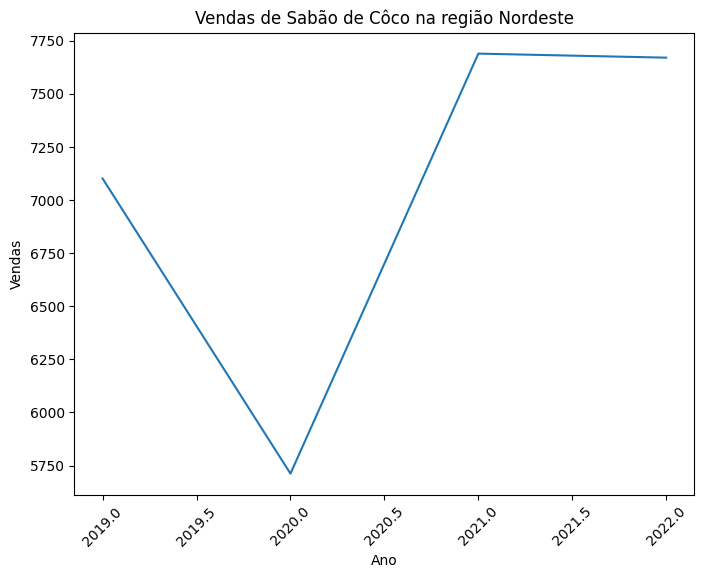

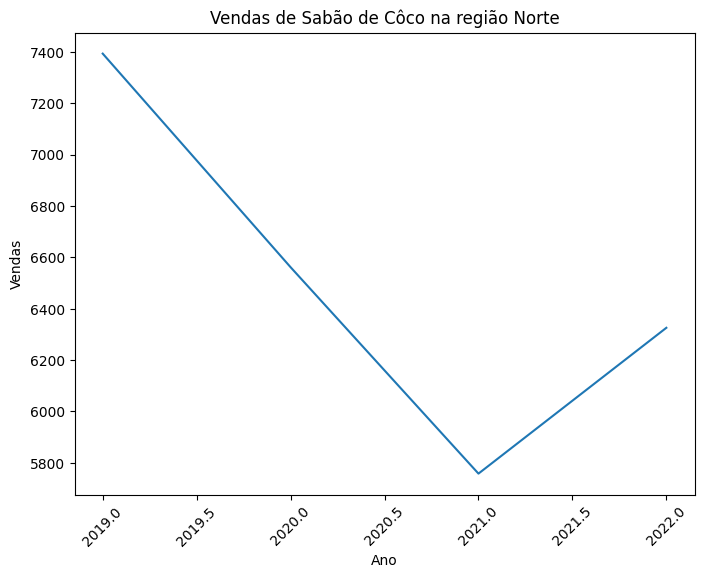

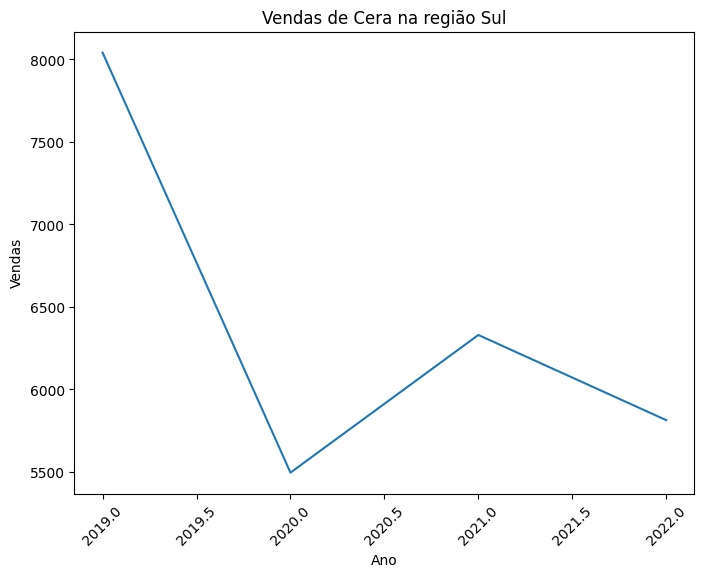

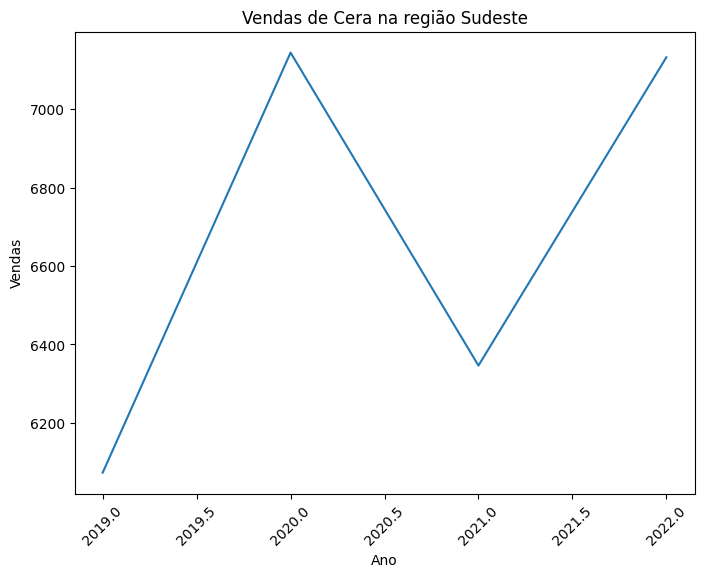

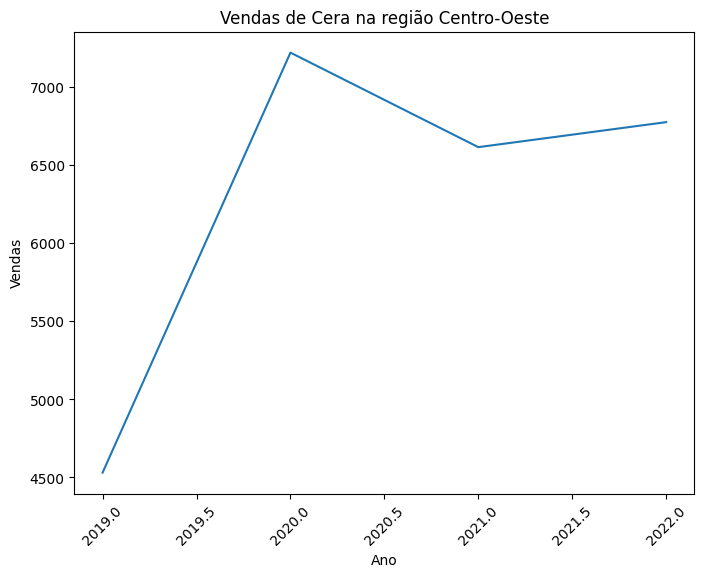

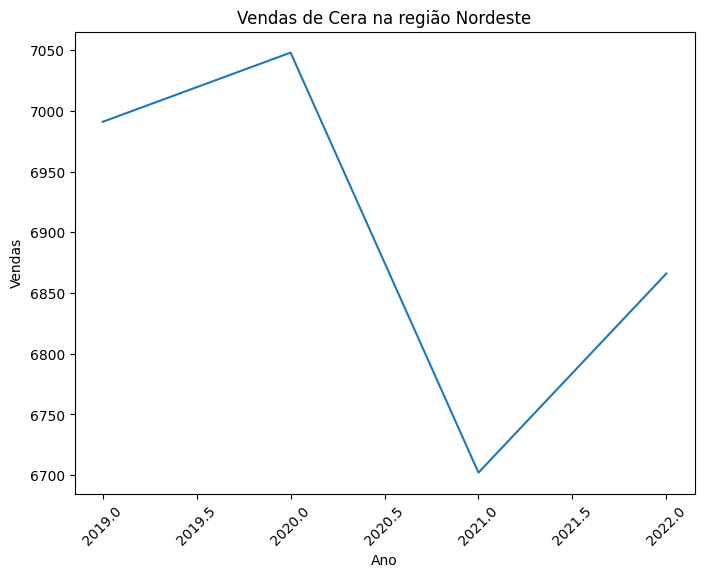

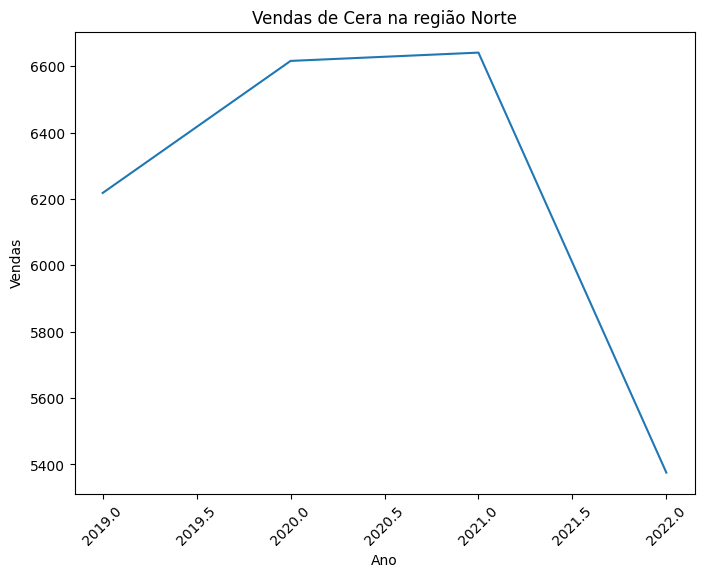

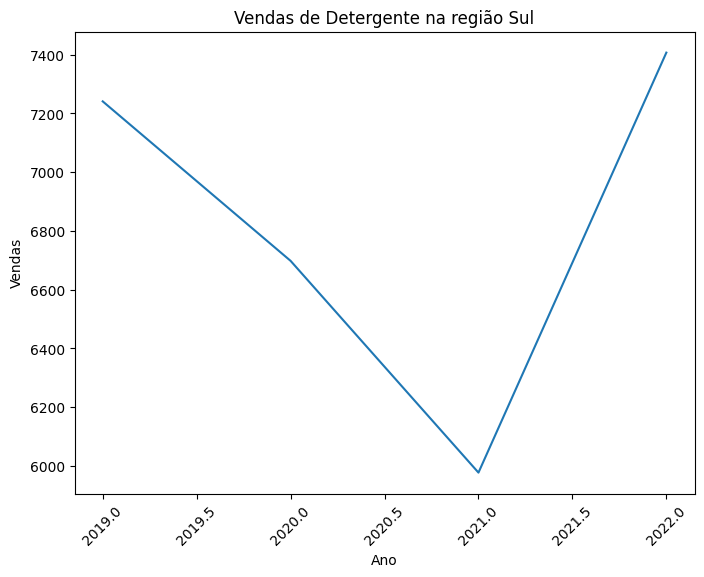

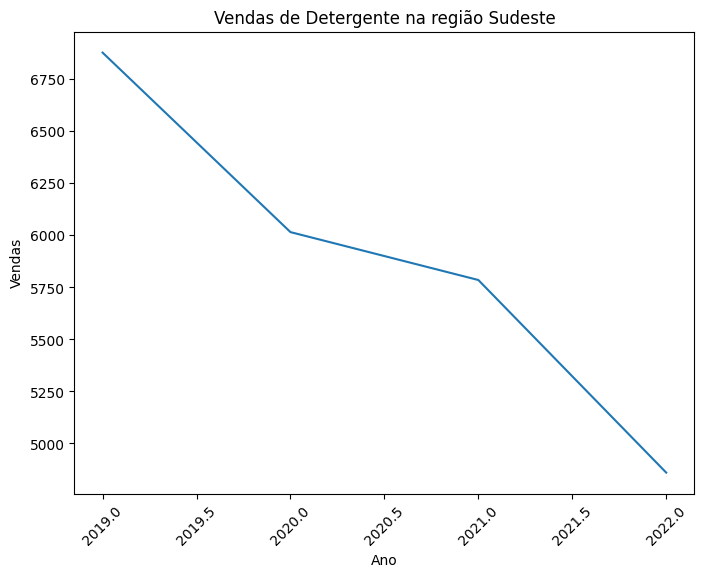

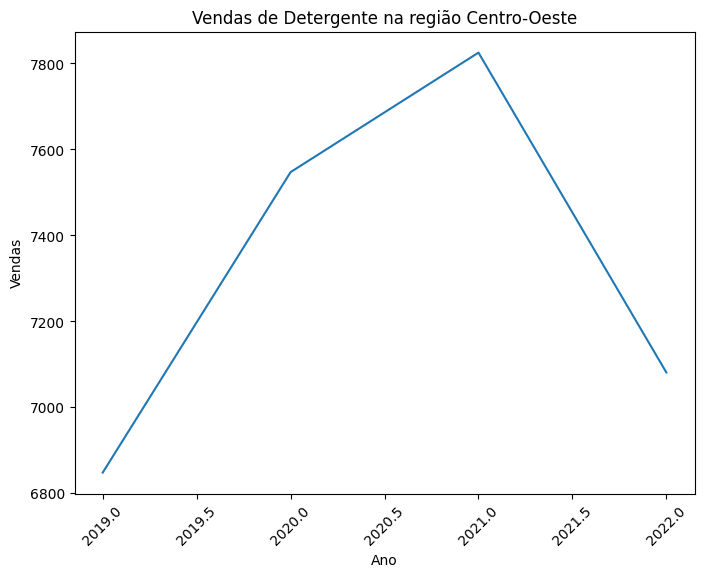

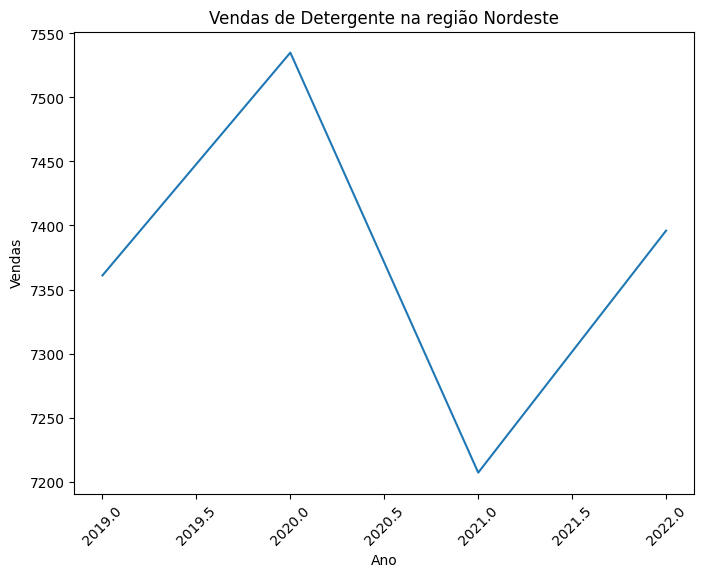

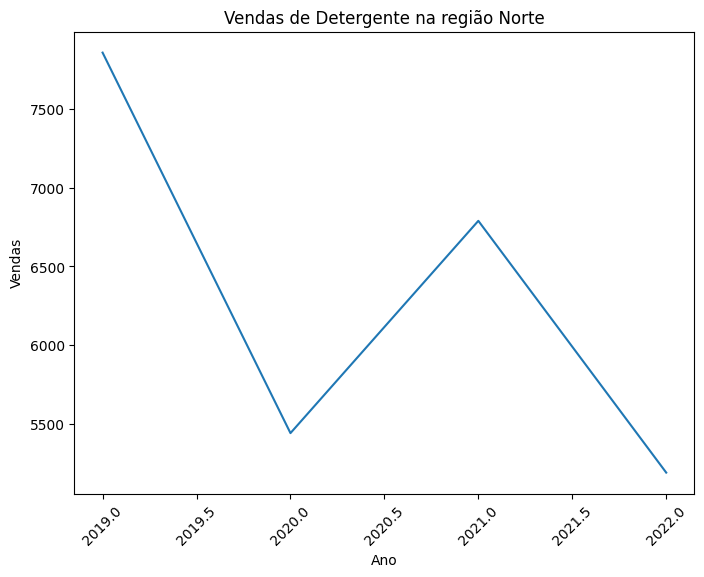

Produto: Cloro, Região: Sul
Média de vendas: 527.25
Mediana de vendas: 457.5
Moda de vendas: 275
Média de custos: 2.590280396776347
Mediana de custos: 2.262376236597996
Moda de custos: 2.251317203399156

Produto: Cloro, Região: Sudeste
Média de vendas: 542.2708333333334
Mediana de vendas: 537.0
Moda de vendas: 535
Média de custos: 2.53648121846188
Mediana de custos: 2.262376236597996
Moda de custos: 1.015697571738558

Produto: Cloro, Região: Centro-Oeste
Média de vendas: 498.1041666666667
Mediana de vendas: 493.0
Moda de vendas: 120
Média de custos: 2.535968989737721
Mediana de custos: 2.262376236597996
Moda de custos: 1.015697571738558

Produto: Cloro, Região: Nordeste
Média de vendas: 635.0625
Mediana de vendas: 670.5
Moda de vendas: 464
Média de custos: 2.590510793301323
Mediana de custos: 2.262376236597996
Moda de custos: 2.262376236597996

Produto: Cloro, Região: Norte
Média de vendas: 569.3541666666666
Mediana de vendas: 579.0
Moda de vendas: 187
Média de custos: 2.50791188708285

In [47]:
# Carregando os dados sintéticos do arquivo CSV
df = pd.read_csv('dados_sinteticos.csv')

# Análise exploratória
print('Tipos de dados:')
print('Quantitativas discretas:', ['Mês', 'Ano', 'Vendas'])
print('Quantitativas contínuas:', ['Custo'])
print('Qualitativas nominais:', ['Produto', 'Região'])

# Série temporal
produtos = df['Produto'].unique()
regioes = df['Região'].unique()
anos = df['Ano'].unique()

# Distribuição
produto = produtos[0]
regiao = regioes[0]
vendas = df[(df['Produto'] == produto) & (df['Região'] == regiao)]['Vendas']
plt.hist(vendas, bins=20)
plt.title(f'Histograma de vendas de {produto} na região {regiao}')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.show()

for produto in produtos:
    for regiao in regioes:
        dados = df[(df['Produto'] == produto) & (df['Região'] == regiao)]
        vendas = dados.groupby(['Ano'])['Vendas'].sum()
        vendas = vendas.reset_index()
        plt.figure(figsize=(8,6))
        plt.xticks(rotation=45)
        plt.plot(vendas['Ano'], vendas['Vendas'])
        plt.title(f'Vendas de {produto} na região {regiao}')
        plt.xlabel('Ano')
        plt.ylabel('Vendas')
        plt.show()

# Tendência central
for produto in produtos:
    for regiao in regioes:
        dados = df[(df['Produto'] == produto) & (df['Região'] == regiao)]
        vendas = dados['Vendas']
        custos = dados['Custo']
        print(f'Produto: {produto}, Região: {regiao}')
        print(f'Média de vendas: {vendas.mean()}')
        print(f'Mediana de vendas: {vendas.median()}')
        print(f'Moda de vendas: {vendas.mode()[0]}')
        print(f'Média de custos: {custos.mean()}')
        print(f'Mediana de custos: {custos.median()}')
        print(f'Moda de custos: {custos.mode()[0]}')
        print()

### Predição de Dados

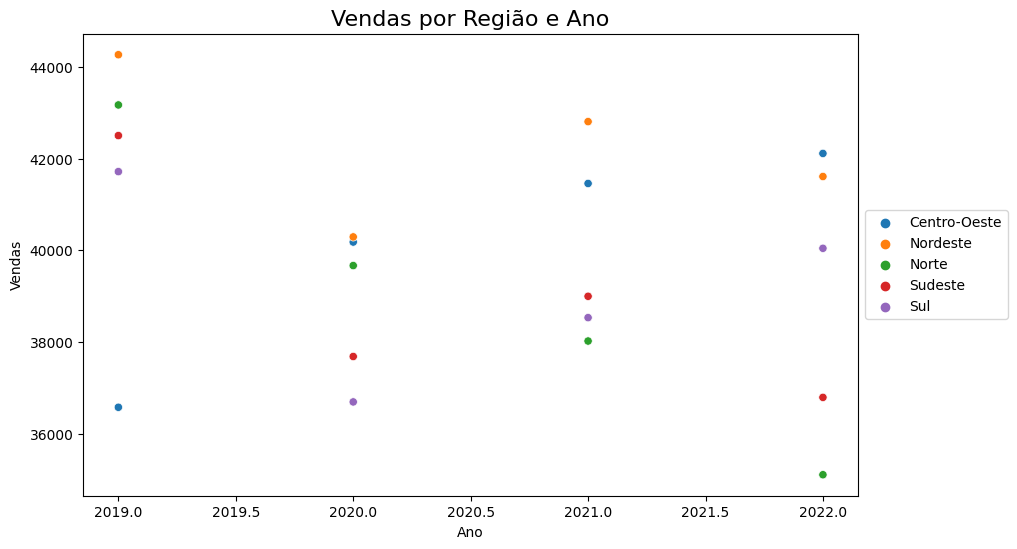

In [48]:
# Lendo os dados sintéticos do arquivo CSV
df = pd.read_csv('dados_sinteticos.csv')

# Agrupando as vendas por região e ano
df_regiao = df.groupby(['Região', 'Ano'])['Vendas'].sum().reset_index()

# Plotando o gráfico de dispersão
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='Ano', y='Vendas', hue='Região', data=df_regiao, ax=ax)

# Configurando o título e legenda do gráfico
ax.set_title('Vendas por Região e Ano', fontsize=16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Prevendo as vendas para o ano de 2023
X = df_regiao[df_regiao['Ano'] < 2023]['Ano'].values.reshape(-1, 1)
y = df_regiao[df_regiao['Ano'] < 2023]['Vendas'].values

model = LinearRegression()
model.fit(X, y)

X_pred = [[2023]]
y_pred = model.predict(X_pred)



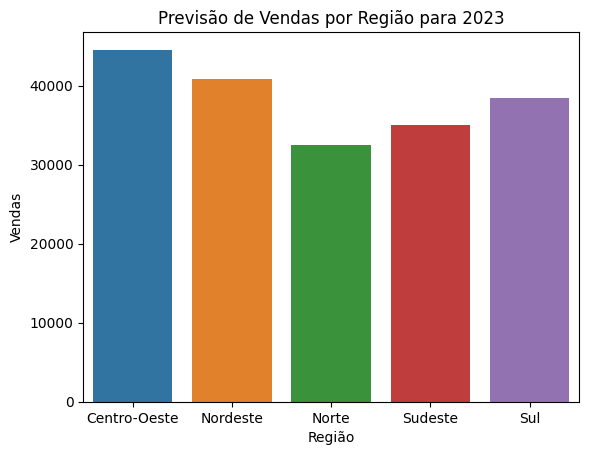

In [49]:
# Importando dados sintéticos
df = pd.read_csv('dados_sinteticos.csv')

# Agrupando dados por região e ano e somando as vendas
df_regiao = df.groupby(['Região', 'Ano'])['Vendas'].sum().reset_index()

# Criando coluna para representar o próximo ano
df_regiao['Proximo_Ano'] = 2023

# Fazendo previsão de vendas para o próximo ano por região
vendas_pred = []
for regiao in df_regiao['Região'].unique():
    X = df_regiao[(df_regiao['Região'] == regiao) & (df_regiao['Ano'] < 2023)][['Ano']].values
    y = df_regiao[(df_regiao['Região'] == regiao) & (df_regiao['Ano'] < 2023)][['Vendas']].values.ravel()
    X_pred = [[2023]]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X_pred)
    vendas_pred.append(y_pred[0])
    
# Criando dataframe com as previsões de vendas por região para o próximo ano
df_pred = pd.DataFrame({
    'Região': df_regiao['Região'].unique(),
    'Vendas': vendas_pred
})

# Plotando gráfico de barras com as previsões de vendas por região para o próximo ano
sns.barplot(x='Região', y='Vendas', data=df_pred)
plt.title('Previsão de Vendas por Região para 2023')
plt.xlabel('Região')
plt.ylabel('Vendas')
plt.show()

### Esclarecimento sobre os Dados (CRISP-DM)

Sobre a valorização dos dados as recomendações são:
- Guardar de forma segura em nuvem com backups os dados do ERP.
- Sempre que possível definir estratégias para alimentar mais ainda os dados internos para refinamentos de análise de dados.
- Coletar dados externos para melhor refinamento dos dados para parametrizar e performar com os dados internos, por exemplo, alimentar dados sobre os fornecedores para entender melhor o cenário de custo.

A partir da análise exploratória preditiva foi constatados que a empresa pode elaborar estrtégias de:

- Transporte para as regiões Norte, Nordeste e Sudeste.
- Transporte e produção maior de Sabão de Côco para região Nordeste e Sul e nas demais Região o Cloro.
- O custo pode aumentar nas regiões mais longes do Sul do Brasil.

Segue uma tabela abaixo para exemplificar melhor conforme os resultados das medianas exploradas anteriormente:

In [50]:
# Agrupando o DataFrame por Produto e Região
df_agrupado = df.groupby(['Produto', 'Região']).sum()

# Ordenando as vendas em ordem decrescente e selecionando a primeira linha de cada grupo
produtos_mais_vendidos = df_agrupado.sort_values(['Região', 'Vendas'], ascending=[True, False]).groupby(['Região']).first().reset_index()

# Mostrando o resultado
print(produtos_mais_vendidos)


         Região    Ano  Mês  Vendas       Custo
0  Centro-Oeste  96984  312   29301  137.724482
1      Nordeste  96984  312   30483  124.344518
2         Norte  96984  312   27388  164.833711
3       Sudeste  96984  312   27173  133.859442
4           Sul  96984  312   28070  133.405842
